<a href="https://colab.research.google.com/github/Vishnu1124-v/Vishnu/blob/main/AIML_Module_3_Lab_2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [8]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [9]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [11]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2))

def knn_return_neighbors(data, query_point, k=3):
    distances = []

    for point in data:
        features = point[:-1]  # All features except the label
        label = point[-1]      # The label/class
        dist = euclidean_distance(features, query_point)
        distances.append((dist, label, features))  # Optionally include features for reference

    # Sort by distance
    distances.sort(key=lambda x: x[0])

    # Return k nearest neighbors
    k_nearest = distances[:k]

    return k_nearest


# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [12]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

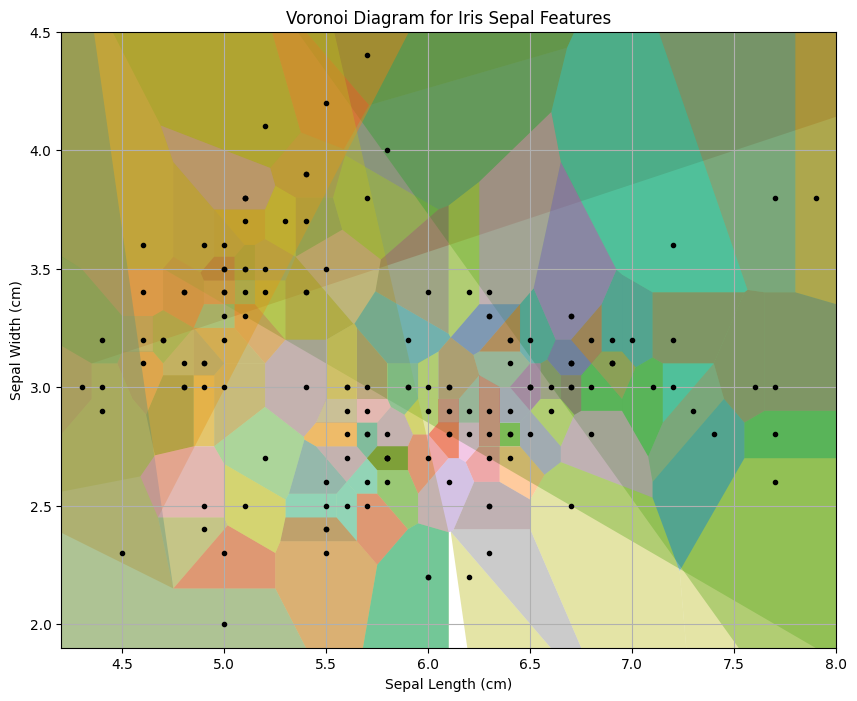

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Helper function to make Voronoi polygons finite
def voronoi_finite_polygons_2d(vor, radius=1000):
    """
    Reconstruct infinite Voronoi regions into finite regions.
    Source: https://gist.github.com/pv/8036995
    """
    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    all_ridges = {}

    # Create a map from points to their ridges
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            far_point = midpoint + n * radius

            new_vertices.append(far_point.tolist())
            new_region.append(len(new_vertices) - 1)

        new_regions.append(new_region)

    return new_regions, np.asarray(new_vertices)

# Create 2D points from sepal length and width
points = df[['sepal length (cm)', 'sepal width (cm)']].values

# Compute Voronoi tesselation
vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)

# Plot
plt.figure(figsize=(10, 8))

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko', markersize=3)
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Voronoi Diagram for Iris Sepal Features")
plt.grid(True)
plt.show()


## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

def decision_boundary_plot(x_dec, y_dec, k):
    h = 0.02  # step size for the meshgrid

    # Ensure y is numpy array
    y_dec = np.array(y_dec)

    # Define color maps
    n = len(np.unique(y_dec))
    cmap_light = ListedColormap(['pink', 'lightgreen', 'lightblue', 'lightyellow'][:n])
    cmap_bold = ['darkred', 'darkgreen', 'darkblue', 'gold'][:n]

    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y_dec)

        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                        palette=cmap_bold, edgecolor="black", s=60)

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("KNN Decision Boundary (k = %i, weights = '%s')" % (k, weights))

    plt.show()


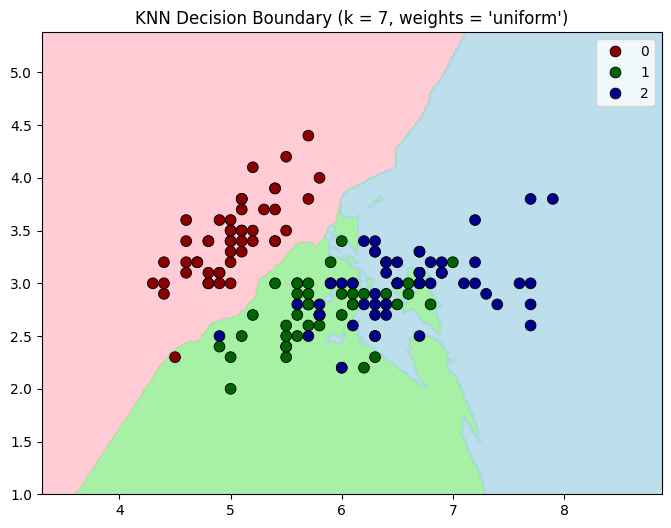

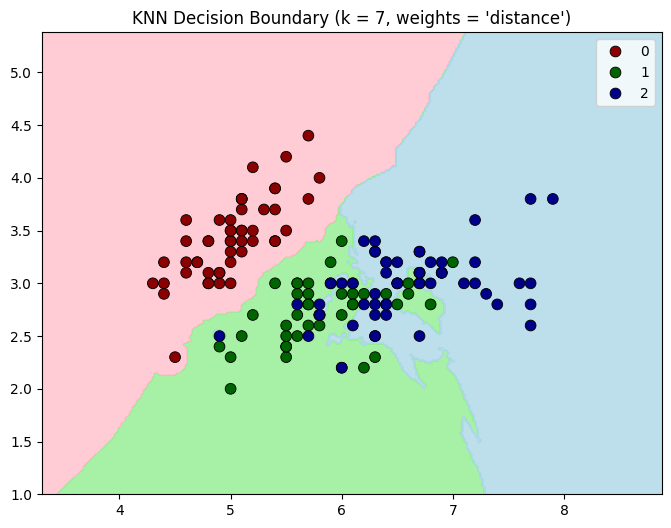

In [16]:
# Required Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
iris = load_iris()
X = iris.data       # all features
y = iris.target     # target labels

# Take only the first two features for 2D plotting
x_pts = X[:, :2]
y_pts = y

# Decision Boundary Plot Function
def decision_boundary_plot(x_dec, y_dec, k):
    h = 0.02  # step size for mesh

    y_dec = np.array(y_dec)  # ensure numpy array

    # Color maps
    n = len(np.unique(y_dec))
    cmap_light = ListedColormap(['pink', 'lightgreen', 'lightblue', 'lightyellow'][:n])
    cmap_bold = ['darkred', 'darkgreen', 'darkblue', 'gold'][:n]

    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y_dec)

        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                        palette=cmap_bold, edgecolor="black", s=60)

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("KNN Decision Boundary (k = %i, weights = '%s')" % (k, weights))

    plt.show()

# Call the function
decision_boundary_plot(x_pts, y_pts, 7)


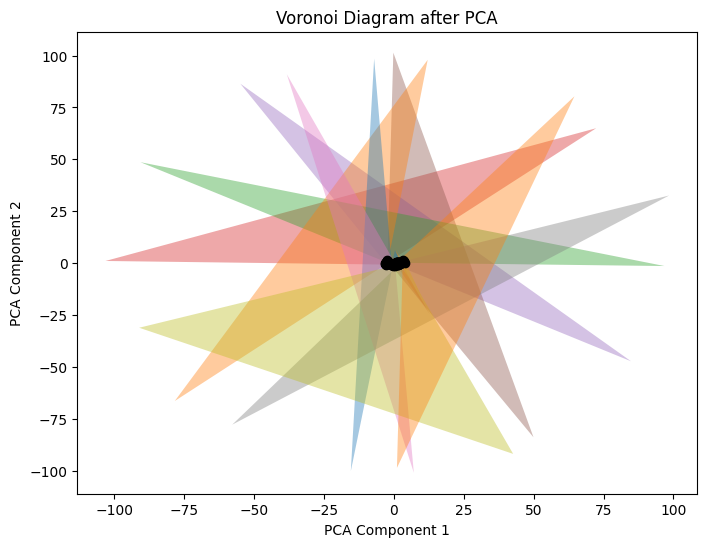

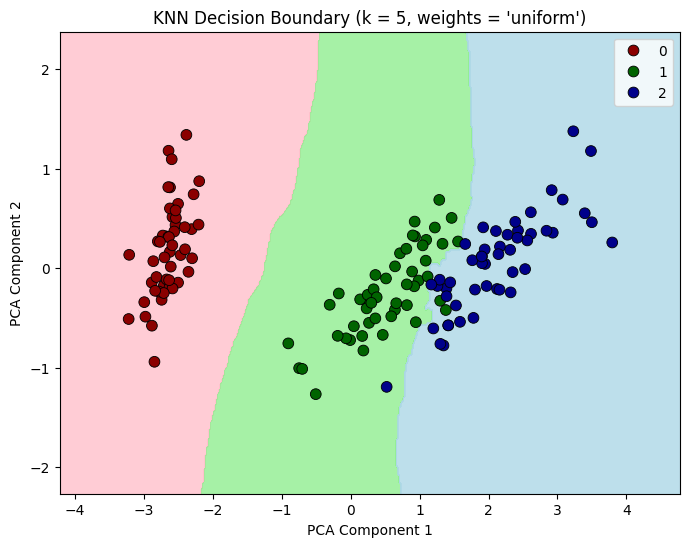

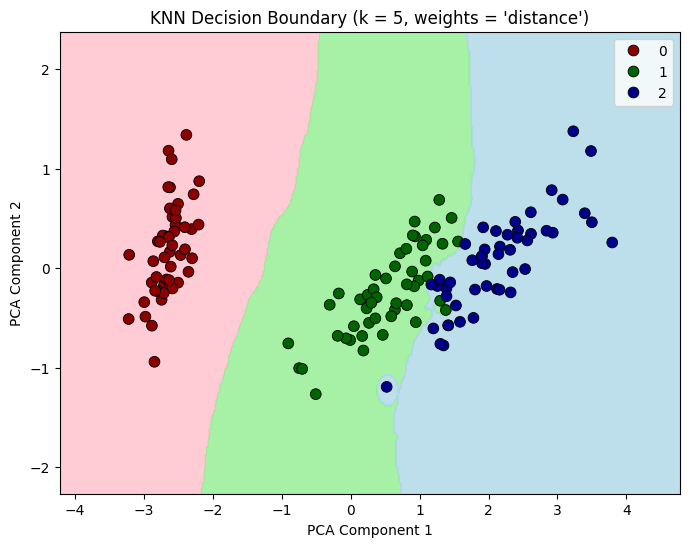

In [17]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

# Optional: Helper for finite Voronoi polygons
def voronoi_finite_polygons_2d(vor, radius=100):
    """
    Reconstruct infinite Voronoi regions to finite ones.
    """
    from collections import defaultdict
    import numpy as np

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    all_ridges = defaultdict(list)

    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges[p1].append((p2, v1, v2))
        all_ridges[p2].append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[p2] - vor.points[p1]
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            far_point = midpoint + n * radius

            new_vertices.append(far_point.tolist())
            new_region.append(len(new_vertices) - 1)

        new_regions.append(new_region)

    return new_regions, np.array(new_vertices)

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ------------------ VORONOI PLOT ------------------
points = X_pca
vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)

plt.figure(figsize=(8, 6))
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:, 0], points[:, 1], 'ko')
plt.title("Voronoi Diagram after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# ------------------ DECISION BOUNDARY PLOT ------------------
def decision_boundary_plot(x_dec, y_dec, k):
    h = 0.02
    y_dec = np.array(y_dec)

    n = len(np.unique(y_dec))
    cmap_light = ListedColormap(['pink', 'lightgreen', 'lightblue'][:n])
    cmap_bold = ['darkred', 'darkgreen', 'darkblue'][:n]

    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y_dec)

        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                        palette=cmap_bold, edgecolor="black", s=60)

        plt.title("KNN Decision Boundary (k = %i, weights = '%s')" % (k, weights))
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

    plt.show()

# Plot decision boundaries with PCA-reduced features
decision_boundary_plot(X_pca, y, 5)


## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

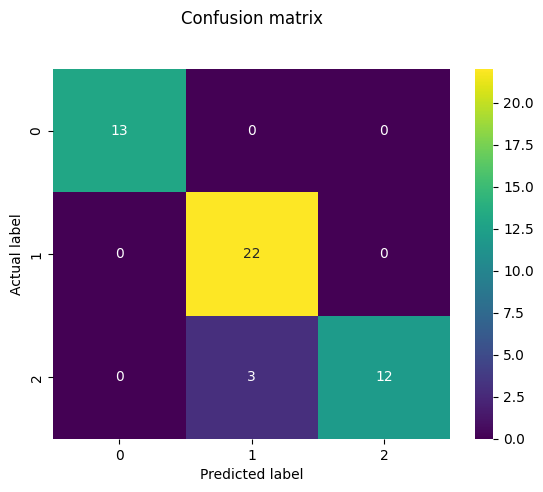

In [20]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [21]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [23]:
import pandas as pd

# URL to the Car Evaluation dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Column names based on dataset documentation
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Read and save the dataset
df = pd.read_csv(url, names=columns)

# Save to CSV locally (for upload in Colab if needed)
df.to_csv("car_evaluation.csv", index=False)

print("✅ car_evaluation.csv file created.")


✅ car_evaluation.csv file created.


In [24]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [25]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [26]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 91.91 %


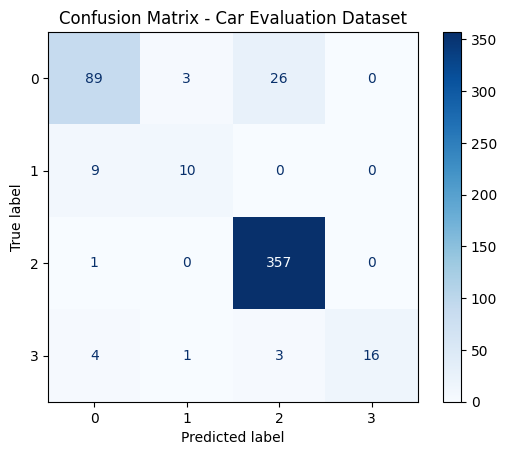

In [28]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset (from local CSV or URL)
# If you already uploaded a file:
# df = pd.read_csv("car_evaluation.csv")

# Or load directly from the web:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)

# Encode all categorical columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Features and label
X = df.drop('class', axis=1)
y = df['class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Car Evaluation Dataset")
plt.show()


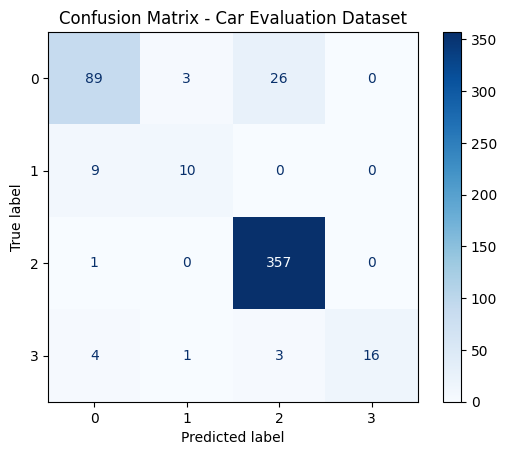

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.75      0.81       118
           1       0.71      0.53      0.61        19
           2       0.92      1.00      0.96       358
           3       1.00      0.67      0.80        24

    accuracy                           0.91       519
   macro avg       0.88      0.74      0.79       519
weighted avg       0.91      0.91      0.90       519



In [29]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Features and label
X = df.drop('class', axis=1)
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix (optional visualization)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Car Evaluation Dataset")
plt.show()

# ✅ TASK-4: Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


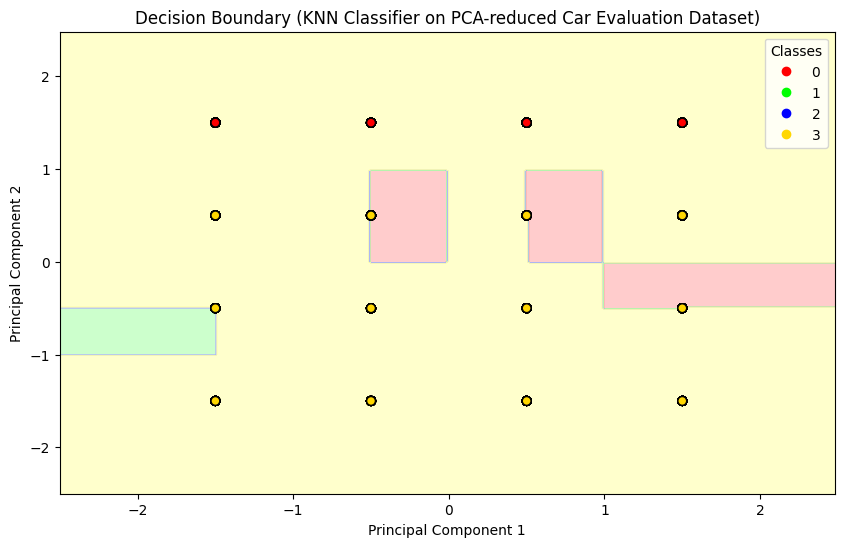

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Features and labels
X = df.drop('class', axis=1)
y = df['class']

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Plot decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFD700'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)

plt.title("Decision Boundary (KNN Classifier on PCA-reduced Car Evaluation Dataset)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


<ipython-input-31-2ff34b5c2afe>:46: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right", labels=classes)


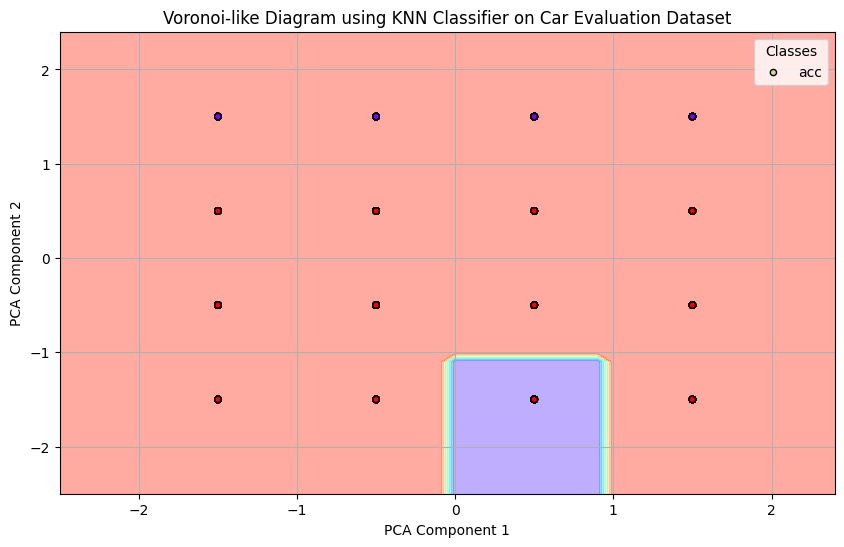

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)

# Step 2: Encode categorical data
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Step 3: Feature selection & dimensionality reduction
X = df.drop('class', axis=1)
y = df['class']
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Step 4: Train KNN classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_2d, y)

# Step 5: Create mesh grid for plotting
h = 0.1  # step size
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Step 6: Predict class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 7: Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.rainbow)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=20, cmap=plt.cm.rainbow, edgecolor='k')

# Add legend
classes = le.inverse_transform(np.unique(y))
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right", labels=classes)
plt.title("Voronoi-like Diagram using KNN Classifier on Car Evaluation Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
